In [1]:
#Install Dependencies

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# define transformer

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

# Load smaller batch size
trainloader_small = DataLoader(trainset, batch_size=64, shuffle=True)
testloader_small = DataLoader(testset, batch_size=64, shuffle=True)


#Larger batch size
trainloader_big = DataLoader(trainset, batch_size=1024, shuffle=True)
testloader_big = DataLoader(testset, batch_size=1024, shuffle=True)


/home/jtlumpk/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
#Model 1

class m1(nn.Module):
    def __init__(self):
        super(m1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(1600, 128)  # Updated size
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

#Model 2
class m2(nn.Module):
    def __init__(self):
        super(m2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(1600, 128)  # Updated size
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model1 = m1()
model2 = m2()

In [4]:
def train(model, trainloader, criterion, optimizer):
    model.train()
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    #print(f"Epoch {epoch} - Training loss: {running_loss/len(trainloader)}")
    return running_loss / len(trainloader)

In [5]:
def test(model, testloader, criterion):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy on the test set: {100 * correct / total}%")
    return 100 * correct / total

In [6]:
#Define criterion and Optimizer
m1 = m1()
m2 = m2()

criterion = nn.CrossEntropyLoss()
m1_optimizer = torch.optim.Adam(m1.parameters(), lr=0.001)
m2_optimizer = torch.optim.Adam(m2.parameters(), lr=0.001)


In [7]:
epochs = 30
shallow_training_losses = []
shallow_test_accuracies = []

deep_training_losses = []
deep_test_accuracies = []

#m1 small
for epoch in range(epochs):
    print(f"Small Epoch: {epoch+1}")
    shallow_train_loss = train(m1, trainloader_small, criterion, m1_optimizer)
    shallow_test_accuracy = test(m1, testloader_small, criterion)

    shallow_training_losses.append(shallow_train_loss)
    shallow_test_accuracies.append(shallow_test_accuracy)
    
#m2 big
for epoch in range(epochs):
    print(f"Big Epoch: {epoch+1}")
    deep_train_loss = train(m2, trainloader_big, criterion, m2_optimizer)
    deep_test_accuracy = test(m2, testloader_big, criterion)

    deep_training_losses.append(deep_train_loss)
    deep_test_accuracies.append(deep_test_accuracy)

Small Epoch: 1


/home/jtlumpk/.local/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Accuracy on the test set: 98.34%
Small Epoch: 2
Accuracy on the test set: 98.9%
Small Epoch: 3
Accuracy on the test set: 99.08%
Small Epoch: 4
Accuracy on the test set: 99.08%
Small Epoch: 5
Accuracy on the test set: 98.98%
Small Epoch: 6
Accuracy on the test set: 99.19%
Small Epoch: 7
Accuracy on the test set: 99.26%
Small Epoch: 8
Accuracy on the test set: 99.38%
Small Epoch: 9
Accuracy on the test set: 99.09%
Small Epoch: 10
Accuracy on the test set: 99.26%
Small Epoch: 11
Accuracy on the test set: 99.12%
Small Epoch: 12
Accuracy on the test set: 99.18%
Small Epoch: 13
Accuracy on the test set: 99.14%
Small Epoch: 14
Accuracy on the test set: 99.17%
Small Epoch: 15
Accuracy on the test set: 99.14%
Small Epoch: 16
Accuracy on the test set: 99.25%
Small Epoch: 17
Accuracy on the test set: 99.21%
Small Epoch: 18
Accuracy on the test set: 99.17%
Small Epoch: 19
Accuracy on the test set: 98.89%
Small Epoch: 20
Accuracy on the test set: 99.34%
Small Epoch: 21
Accuracy on the test set: 99.

In [8]:
# linear interpolation model
class InterpolatedModel(nn.Module):
    def __init__(self, model1, model2, alpha):
        super(InterpolatedModel, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.alpha = alpha

    def forward(self, x):
        output1 = self.model1(x)
        output2 = self.model2(x)
        return self.alpha * output1 + (1 - self.alpha) * output2

# create interpolated model
interpolated_model = InterpolatedModel(m1, m2, alpha=0.5)

# Optimizer for interpolated model
interpolated_optimizer = torch.optim.Adam(interpolated_model.parameters(), lr=0.001)

interpolated_training_losses = []
interpolated_test_accuracies = []

# Training nterpolated model
for epoch in range(epochs):
    print(f"Epoch: {epoch+1}")
    interp_train_loss = train(interpolated_model, trainloader_small, criterion, interpolated_optimizer)
    interp_test_accuracy = test(interpolated_model, testloader_small, criterion)

    interpolated_training_losses.append(interp_train_loss)
    interpolated_test_accuracies.append(interp_test_accuracy)

Epoch: 1
Accuracy on the test set: 99.34%
Epoch: 2
Accuracy on the test set: 99.26%
Epoch: 3
Accuracy on the test set: 99.36%
Epoch: 4
Accuracy on the test set: 99.26%
Epoch: 5
Accuracy on the test set: 99.19%
Epoch: 6
Accuracy on the test set: 99.27%
Epoch: 7
Accuracy on the test set: 99.15%
Epoch: 8
Accuracy on the test set: 99.31%
Epoch: 9
Accuracy on the test set: 99.4%
Epoch: 10
Accuracy on the test set: 99.41%
Epoch: 11
Accuracy on the test set: 99.42%
Epoch: 12
Accuracy on the test set: 99.42%
Epoch: 13
Accuracy on the test set: 99.42%
Epoch: 14
Accuracy on the test set: 99.44%
Epoch: 15
Accuracy on the test set: 99.42%
Epoch: 16
Accuracy on the test set: 99.42%
Epoch: 17
Accuracy on the test set: 99.42%
Epoch: 18
Accuracy on the test set: 99.42%
Epoch: 19
Accuracy on the test set: 99.41%
Epoch: 20
Accuracy on the test set: 99.42%
Epoch: 21
Accuracy on the test set: 99.41%
Epoch: 22
Accuracy on the test set: 99.41%
Epoch: 23
Accuracy on the test set: 99.42%
Epoch: 24
Accuracy on

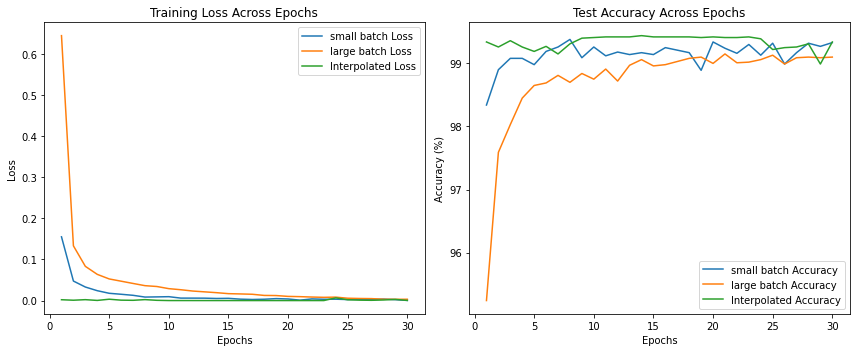

In [10]:
# Update the plotting code
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), shallow_training_losses, label='small batch Loss')
plt.plot(range(1, epochs+1), deep_training_losses, label='large batch Loss')
plt.plot(range(1, epochs+1), interpolated_training_losses, label='Interpolated Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Across Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), shallow_test_accuracies, label='small batch Accuracy')
plt.plot(range(1, epochs+1), deep_test_accuracies, label='large batch Accuracy')
plt.plot(range(1, epochs+1), interpolated_test_accuracies, label='Interpolated Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Across Epochs')
plt.legend()
plt.tight_layout()
plt.show()